In [90]:
# 판다스 라이브러리를 활용해서 csv파일 읽어오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [91]:
data = pd.read_csv('final_data.csv').set_index('date').astype('float32')
data

,ma_temp,ma_min_temp,ma_max_temp,ma_rain,avg_price
date,,,,,
2015.6.1,8.272368,2.910526,14.100657,2.511842,2540.0
2015.6.2,8.442105,3.067105,14.286184,2.527632,2560.0
2015.6.3,8.605921,3.221053,14.460526,2.525000,2500.0
2015.6.4,8.758553,3.363158,14.621053,2.525000,2500.0
2015.6.5,8.849342,3.463158,14.692763,2.549342,2460.0
...,...,...,...,...,...
2021.4.30,5.211184,-0.052632,10.975000,2.289474,3532.0
2021.5.1,5.265131,0.014474,11.015789,2.350658,3532.0
2021.5.2,5.330921,0.083553,11.078289,2.365789,3532.0


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2165 entries, 2015.6.1 to 2021.5.4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ma_temp      2165 non-null   float32
 1   ma_min_temp  2165 non-null   float32
 2   ma_max_temp  2165 non-null   float32
 3   ma_rain      2165 non-null   float32
 4   avg_price    2165 non-null   float32
dtypes: float32(5)
memory usage: 59.2+ KB


### 1. OLS, Linear_Min,max

In [93]:
from sklearn.model_selection import train_test_split

X = data.drop('avg_price', axis=1)
y = data['avg_price'].values
y = y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13)

In [94]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MMS = MinMaxScaler()
SS = StandardScaler()

SS.fit(X)
MMS.fit(X)

X_ss = SS.transform(X)
X_mms = MMS.transform(X)

X_ss_pd = pd.DataFrame(X_ss, columns=X.columns)
X_mms_pd = pd.DataFrame(X_mms, columns=X.columns)

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_mms_pd, y, test_size = 0.2, random_state=13)

In [96]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1732 entries, 667 to 338
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ma_temp      1732 non-null   float32
 1   ma_min_temp  1732 non-null   float32
 2   ma_max_temp  1732 non-null   float32
 3   ma_rain      1732 non-null   float32
dtypes: float32(4)
memory usage: 40.6 KB


In [97]:
X_train['ma_rain'].unique()

array([0.0682189 , 0.7339464 , 0.05413021, ..., 0.5731129 , 0.39856148,
       0.212665  ], dtype=float32)

In [98]:
y_train.shape

(1732, 1)

In [99]:
import statsmodels.api as sm
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.684
Model:                            OLS   Adj. R-squared (uncentered):              0.684
Method:                 Least Squares   F-statistic:                              936.6
Date:                Tue, 18 May 2021   Prob (F-statistic):                        0.00
Time:                        12:48:01   Log-Likelihood:                         -14860.
No. Observations:                1732   AIC:                                  2.973e+04
Df Residuals:                    1728   BIC:                                  2.975e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
ma_temp       -1.5e+05   1.08e+04    -13.942      0.000   -1.71e+05   -1.29e+05
ma_min_temp  6.602e+04   4887.673     13.506      0.000    5.64e+04    7.56e+04
ma_max_temp  8.532e+04   6102.379     13.981      0.000    7.34e+04    9.73e+04
ma_rain      2649.8809    318.782      8.313      0.000    2024.641    3275.120
==============================================================================
Omnibus:                      294.999   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              491.405
Skew:                           1.109   Prob(JB):                    1.96e-107
Kurtosis:                       4.375   Cond. No.                         493.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
predictions = lm.predict(X_test)
predictions

25      1182.453125
2112    1076.633301
1889    1644.218750
1878    1224.640625
724      636.526367
           ...     
801     2096.058594
1759    1094.821289
1754    1163.909180
1866    1160.894531
1859     979.437500
Length: 433, dtype: float32

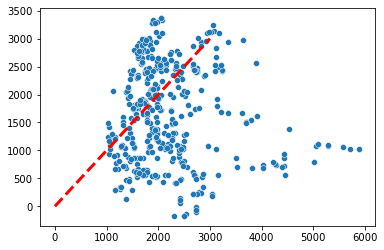

In [101]:
sns.scatterplot(y_test.reshape(-1,), predictions);
plt.plot([0,3000], [0,3000], 'r', ls='dashed', lw=3)

In [102]:
from sklearn import metrics

In [103]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MSE: 1728777.8
RMSE: 1314.83


### 2. OLS, Linear_Standardscaler

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ss_pd, y, test_size = 0.2, random_state=13)

In [105]:
X_train['ma_rain'].unique()

array([-1.1693234 ,  1.5859537 , -1.2276329 , ...,  0.92030466,
        0.19788076, -0.5714977 ], dtype=float32)

In [106]:
y_train.shape

(1732, 1)

In [107]:
import statsmodels.api as sm
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.016
Model:                            OLS   Adj. R-squared (uncentered):              0.014
Method:                 Least Squares   F-statistic:                              6.976
Date:                Tue, 18 May 2021   Prob (F-statistic):                    1.44e-05
Time:                        12:48:03   Log-Likelihood:                         -15844.
No. Observations:                1732   AIC:                                  3.170e+04
Df Residuals:                    1728   BIC:                                  3.172e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
ma_temp      1.645e+04   7043.029      2.336      0.020    2635.445    3.03e+04
ma_min_temp -4445.6855   3075.512     -1.446      0.148   -1.05e+04    1586.433
ma_max_temp -1.192e+04   4077.755     -2.923      0.004   -1.99e+04   -3920.374
ma_rain      -113.0956    142.611     -0.793      0.428    -392.804     166.612
==============================================================================
Omnibus:                      940.973   Durbin-Watson:                   0.215
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6997.655
Skew:                           2.488   Prob(JB):                         0.00
Kurtosis:                      11.498   Cond. No.                         309.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
predictions = lm.predict(X_test)
predictions

25     -313.647339
2112   -192.459473
1889     97.087891
1878     60.429565
724    -316.485352
           ...    
801    -424.859131
1759    -25.500977
1754     11.151855
1866   -119.610321
1859   -116.861267
Length: 433, dtype: float32

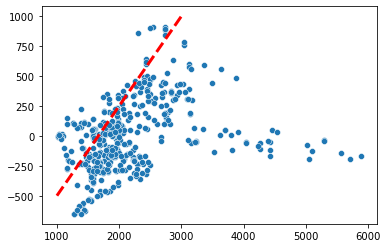

In [109]:
sns.scatterplot(y_test.reshape(-1,), predictions);
plt.plot([1000,3000], [-500,1000], 'r', ls='dashed', lw=3)

In [110]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MSE: 5226042.0
RMSE: 2286.0537


In [111]:
# Minmax scaler를 쓰는 게 좋다

### 3. RandomForest

In [112]:
from sklearn.ensemble import RandomForestRegressor

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_mms_pd, y, test_size = 0.2, random_state=13)

In [114]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [115]:
print(rf.score(X_train, y_train))

0.9680782359751566


In [116]:
print(rf.score(X_test, y_test))

0.8208077846392032


In [117]:
pred = rf.predict(X_test)

In [118]:
pd.DataFrame(pred)

,0
0,1863.52
1,3121.80
2,1838.94
3,1841.20
4,1583.10
...,...
428,1986.30
429,1418.92
430,1375.44
431,1956.30


In [119]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)

    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)

    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)

    # 평균을 낸다.
    mean_difference = difference.mean()

    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)

    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [120]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [121]:
%time score = cross_val_score(rf, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

CPU times: user 3.22 s, sys: 16.3 ms, total: 3.23 s
Wall time: 3.23 s
Score= 0.41790


In [122]:
predictions = rf.predict(X_test)

print(predictions.shape)
predictions[0:10]

(433,)


array([1863.52, 3121.8 , 1838.94, 1841.2 , 1583.1 , 1939.2 , 1802.6 ,
       3546.98, 3097.02, 2416.1 ])